# Logistic Regression 구현
1) 제가 제시한 틀을 사용하여 구현을 할 필요는 없습니다. 원하시는 대로 구현하시면 됩니다.  
2) 단, code copy는 허용하지 않습니다. 코드 주석을 꼭 상세히 달아주세요. 주석이 부족한 경우, 미제출로 간주합니다.

### None 값을 채워주세요!!!!!

In [1]:
import math, random
from functools import partial,reduce
from assignment2 import *
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
"""
data 설명
1) Label: 유료 계정 등록 여부(target)
2) bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)
3) experience: 근속연수
4) salary: 연봉

어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.
"""

'\ndata 설명\n1) Label: 유료 계정 등록 여부(target)\n2) bias: 회귀 모형에서의 상수항을 위한 term (추정 시 포함하지 않아도 ok)\n3) experience: 근속연수\n4) salary: 연봉\n\n어떤 사용자가 유료 계정을 등록할지(Label == 1)에 대한 예측을 로지스틱 회귀 모형으로 진행합니다.\n'

In [3]:
data = pd.read_csv('assignment_2.csv')

In [4]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


### 0. Gradient Descent

Gradient Descent Algorithm은 어떤 모델에 대한 비용(Cost)를 최소화 시키는 알고리즘
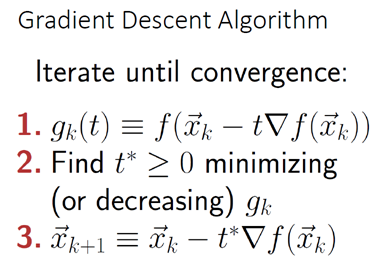

In [5]:
def step(v, direction, step_size):
    """
    v = x vector
    diriection = gradient vector
    step size = learning rate
    """
    return [v_idx - step_size*dir_idx for v_idx,dir_idx  in zip(v,direction)]

###step함수 test

step_size_ex = 10
v_ex = np.array([100,200,300,400])
direction_ex  = np.array([1,2,3,4])

ex = step(v_ex,direction_ex,step_size_ex)

print(type(ex))
ex

<class 'list'>


[90, 180, 270, 360]

In [6]:
def safe(f) :
    """
    f에 대한 예외처리를 위한 함수(f가 infinite일 때)
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

θ_next = θ_now-tolerance*gradient


In [44]:
def minimize_bgd(target_fn, gradient_fn, theta_0, tolerance = 0.00001): # bgd: batch gradient descent
    """
    목적함수를 최소화시키는 theta를 경사 하강법을 사용해서 찾는다.
    """
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    
    # 시작점 설정
    theta = theta_0
    target_fn = safe(target_fn) # 오류를 처리할 수 있는 target_fn으로 변환
    value = target_fn(theta) # 최소화시키려는 값
    
    while True:
        gradient = gradient_fn(theta) # gradient값 계산
        next_thetas = [step(theta,gradient,step_size) for step_size in step_sizes] 
        ###θ_next = θ_now-step_size*gradient
        
        # 함수를 최소화시키는 theta 선택
        obj = next_thetas 
        key = target_fn ##next_thetas중min
        next_theta = min(obj, key = key)
        next_value = target_fn(next_theta)
        print(next_value)
        # tolerance만큼 수렴하면 멈춤
        temp =abs( next_value - value )
        if temp < tolerance: #오차가 tolerance보다 작으면
            return theta #최적의 learning rate
        else: 
            value = next_value #value, theta 갱신
            theta = next_theta
        

### 1. 로지스틱 함수
해당 함수는 1/(1+exp[-(ax+b)]로 표현되었음을 기억합시다.

In [34]:
def logistic(x):
    #x값 예외처리
    try:
        return 1.0 / (1 + math.exp(-x))
    except OverflowError:
        return 1e-9

In [33]:
logistic(-100) #test

3.7200759760208356e-44

softmax함수
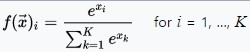

In [55]:
def softmax(x):  
    return np.exp(x) / np.sum(np.exp(x), axis=0)

###softmax test

x_test = np.array([1.0,5.0,2.0])
softmax(x_test)

array([0.01714783, 0.93623955, 0.04661262])

### 2. Likelihood 구현


In [40]:
def logistic_log_likelihood_i(x_i, y_i, beta): # 개별 데이터포인트에 대한 likelihood 값
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return (1-y_i)*math.log(logistic(1-dot(x_i, beta))+1e-9) #예외처리 포함

In [38]:
def logistic_log_likelihood(x_m,y_v,beta): # 전체 데이터에 대한 likelihood
    loglikelihood = 0.0
    for x_idx,y_idx in zip(x_m,y_v):                    
        loglikelihood += logistic_log_likelihood_i(x_idx, y_idx, beta)
    return loglikelihood

### 3. Gradient for Log Reg


#### logistic_log_partial:

하나의 값에 대한 gradient를 구하는 함수


#### logistic_log_gradient_i
column에 대한 gradient를 구하는 함수

#### logistic_log_gradient
전체 data에 대한 gradient를 구하는 함수

In [13]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    return [logistic_log_partial_ij(x_i, y_i, beta, j) for j, _ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(vector_add, [logistic_log_gradient_i(x_i, y_i, beta) for x_i, y_i in zip(x,y)])




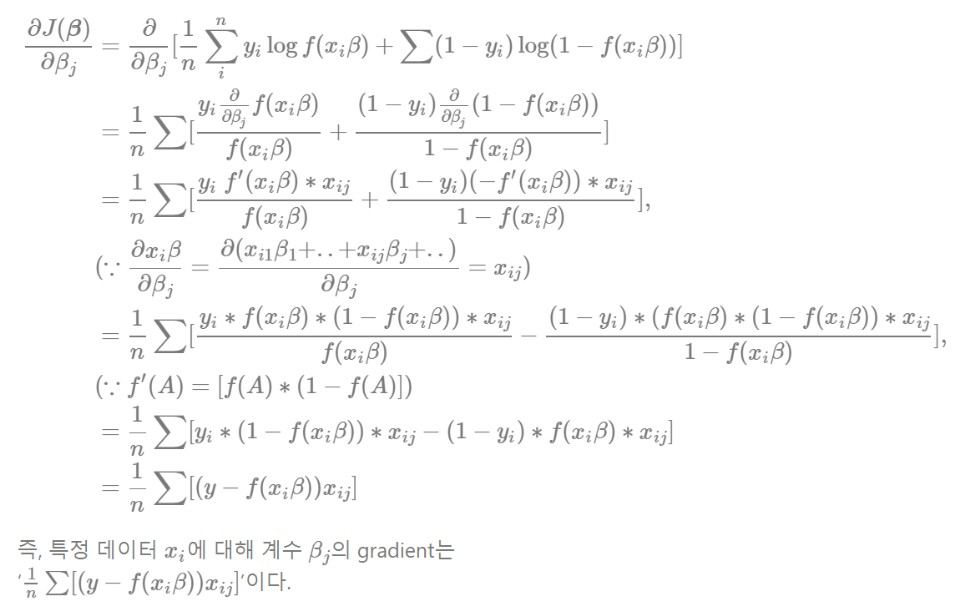

### 4. Model Fitting
위에서 구현한 log likelihood를 이용하여 Model을 Fitting 시켜보세요.  
앞서 우리는 log likelihood를 maximize하는 방향으로 회귀계수를 추정한다고 배웠습니다.  
Gradient Descent는 경사 "하강법"으로 최솟값을 찾는 데에 사용되는 알고리즘입니다.  
따라서 log likelihood를 적절히 변형을 해야 Gradient Descent 코드를 적용할 수 있습니다.  
log likelihood 변형 함수는 assignment2.py에 구현되어있으니, None값만 채워주시면 됩니다.

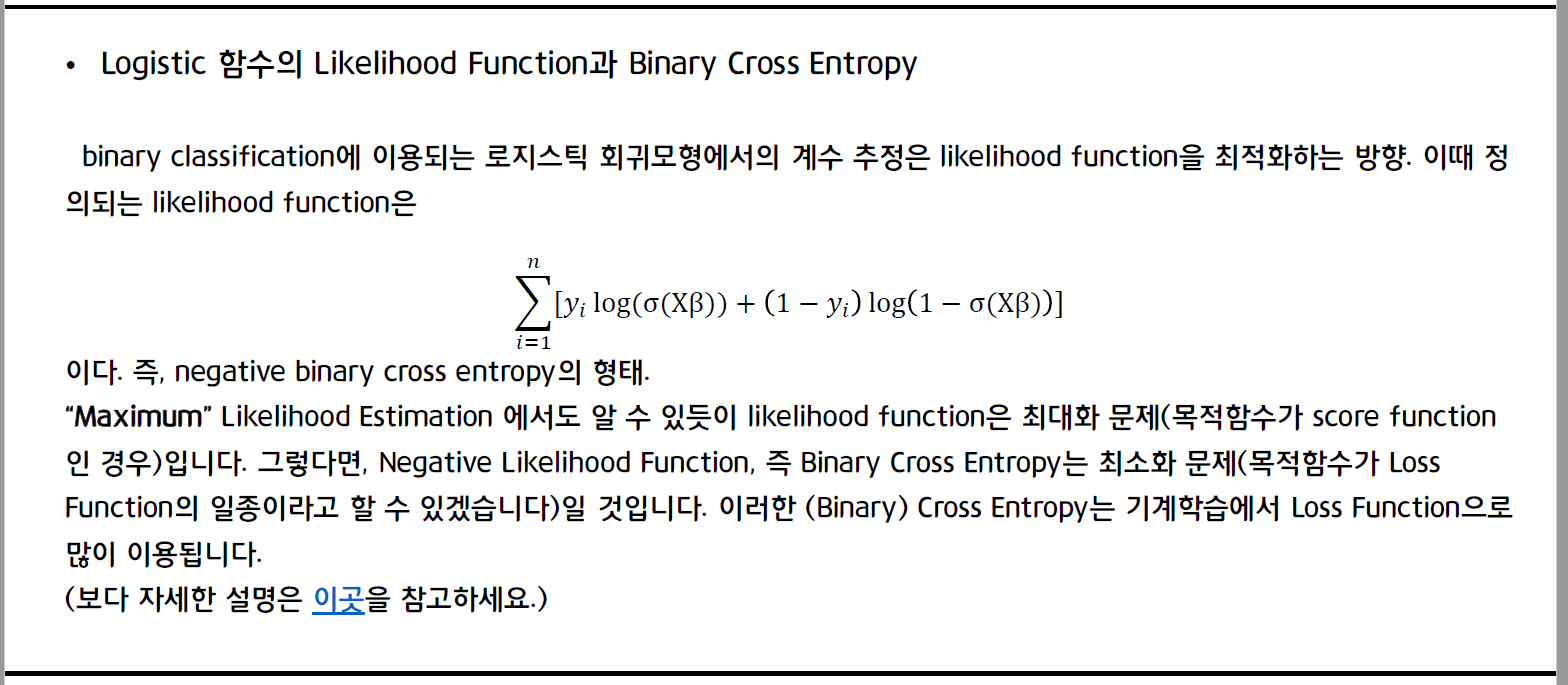  
https://curt-park.github.io/2018-09-19/loss-cross-entropy/

In [14]:
data

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000
...,...,...,...,...
195,0,1,6.5,84000
196,0,1,6.9,73000
197,0,1,5.1,72000
198,1,1,9.1,69000


In [15]:
X = data.drop('Label', axis = 1)
y = data['Label']

In [16]:
from sklearn.model_selection import train_test_split
import random

In [17]:
random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [18]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [51]:
from sklearn.preprocessing import StandardScaler
X[:10] ## X: 데이터 스케일이 필요함.
scaler = StandardScaler() # Scaling
scaler.fit_transform(X_train)
scaler.fit_transform(X_test)

array([[ 0.        , -1.79491747, -2.52586949],
       [ 0.        ,  1.80783054,  1.70858932],
       [ 0.        ,  0.41321841,  0.86169756],
       [ 0.        ,  0.68439299, -0.18063076],
       [ 0.        , -1.71743902, -0.83208596],
       [ 0.        , -0.01291308,  0.21024236],
       [ 0.        , -1.75617824, -1.54868668],
       [ 0.        ,  0.91682835,  0.40567892],
       [ 0.        ,  0.91682835,  0.53596996],
       [ 0.        ,  0.9943068 ,  1.90402588],
       [ 0.        ,  0.64565377, -0.70179492],
       [ 0.        ,  0.80061067,  0.79655204],
       [ 0.        , -0.74895837, -0.44121284],
       [ 0.        ,  0.33573996,  0.47082444],
       [ 0.        ,  0.1033046 ,  1.25257068],
       [ 0.        , -0.16786998, -1.6138322 ],
       [ 0.        , -0.78769759, -0.37606732],
       [ 0.        ,  1.18800293,  1.18742516],
       [ 0.        , -1.13635063, -0.50635836],
       [ 0.        ,  0.25826151,  0.40567892],
       [ 0.        , -0.90391527, -0.050

In [52]:
# 아래에 Model Fitting 진행
from functools import partial # partial을 이용해 fn과 gradient_fn 구현

fn = partial(logistic_log_likelihood,X_train,y_train)
fn = neg(fn)

gradient_fn = partial(logistic_log_gradient,X_train,y_train)
gradient_fn = neg_all(gradient_fn)

 

beta_0 = [random.random() for _ in range(3)] # 임의의 시작점
print(type(beta_0))
# 경사 하강법으로 최적화
beta_hat = minimize_bgd(fn,gradient_fn,beta_0)

<class 'list'>
787.4841017079651
787.4841017079651


In [53]:
beta_hat


[-9599.761384071384, -43149.03245974971, -650699999.1968205]